In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Load the dataset
data = pd.read_csv('spambase.data', header=None)

In [4]:
data.shape

(4601, 58)

In [5]:
data.size

266858

In [6]:
data.head()


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [8]:
# List of feature names based on spambase.names
feature_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 
    'capital_run_length_longest', 'capital_run_length_total', 'is_spam'
]
# Assign the names to the DataFrame columns
data.columns = feature_names

# Verify the shape and preview the data
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

Dataset Shape: (4601, 58)

First 5 Rows of the Dataset:
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0

In [9]:
data.isnull()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4599,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [11]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [12]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())




Summary Statistics:
       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min      

In [13]:
# Class distribution
print("\nClass Distribution (0 = Non-Spam, 1 = Spam):")
print(data['is_spam'].value_counts())

# Check for missing values
print("\nTotal Missing Values:", data.isnull().sum().sum())


Class Distribution (0 = Non-Spam, 1 = Spam):
is_spam
0    2788
1    1813
Name: count, dtype: int64

Total Missing Values: 0


C:\Users\shibam\AppData\Local\Temp\ipykernel_23476\1882748330.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_spam', data=data, palette='pastel')


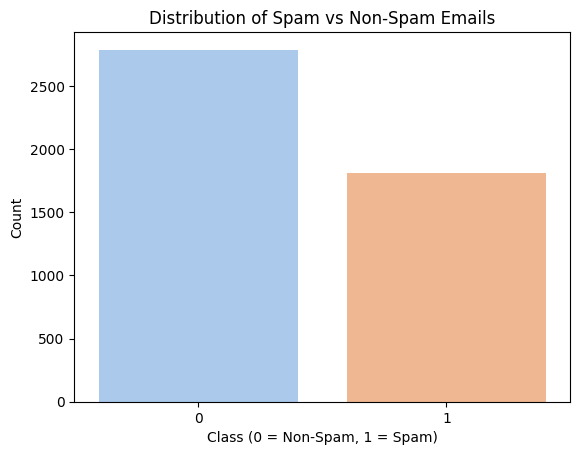

In [14]:
sns.countplot(x='is_spam', data=data, palette='pastel')
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Class (0 = Non-Spam, 1 = Spam)')
plt.ylabel('Count')
plt.show()


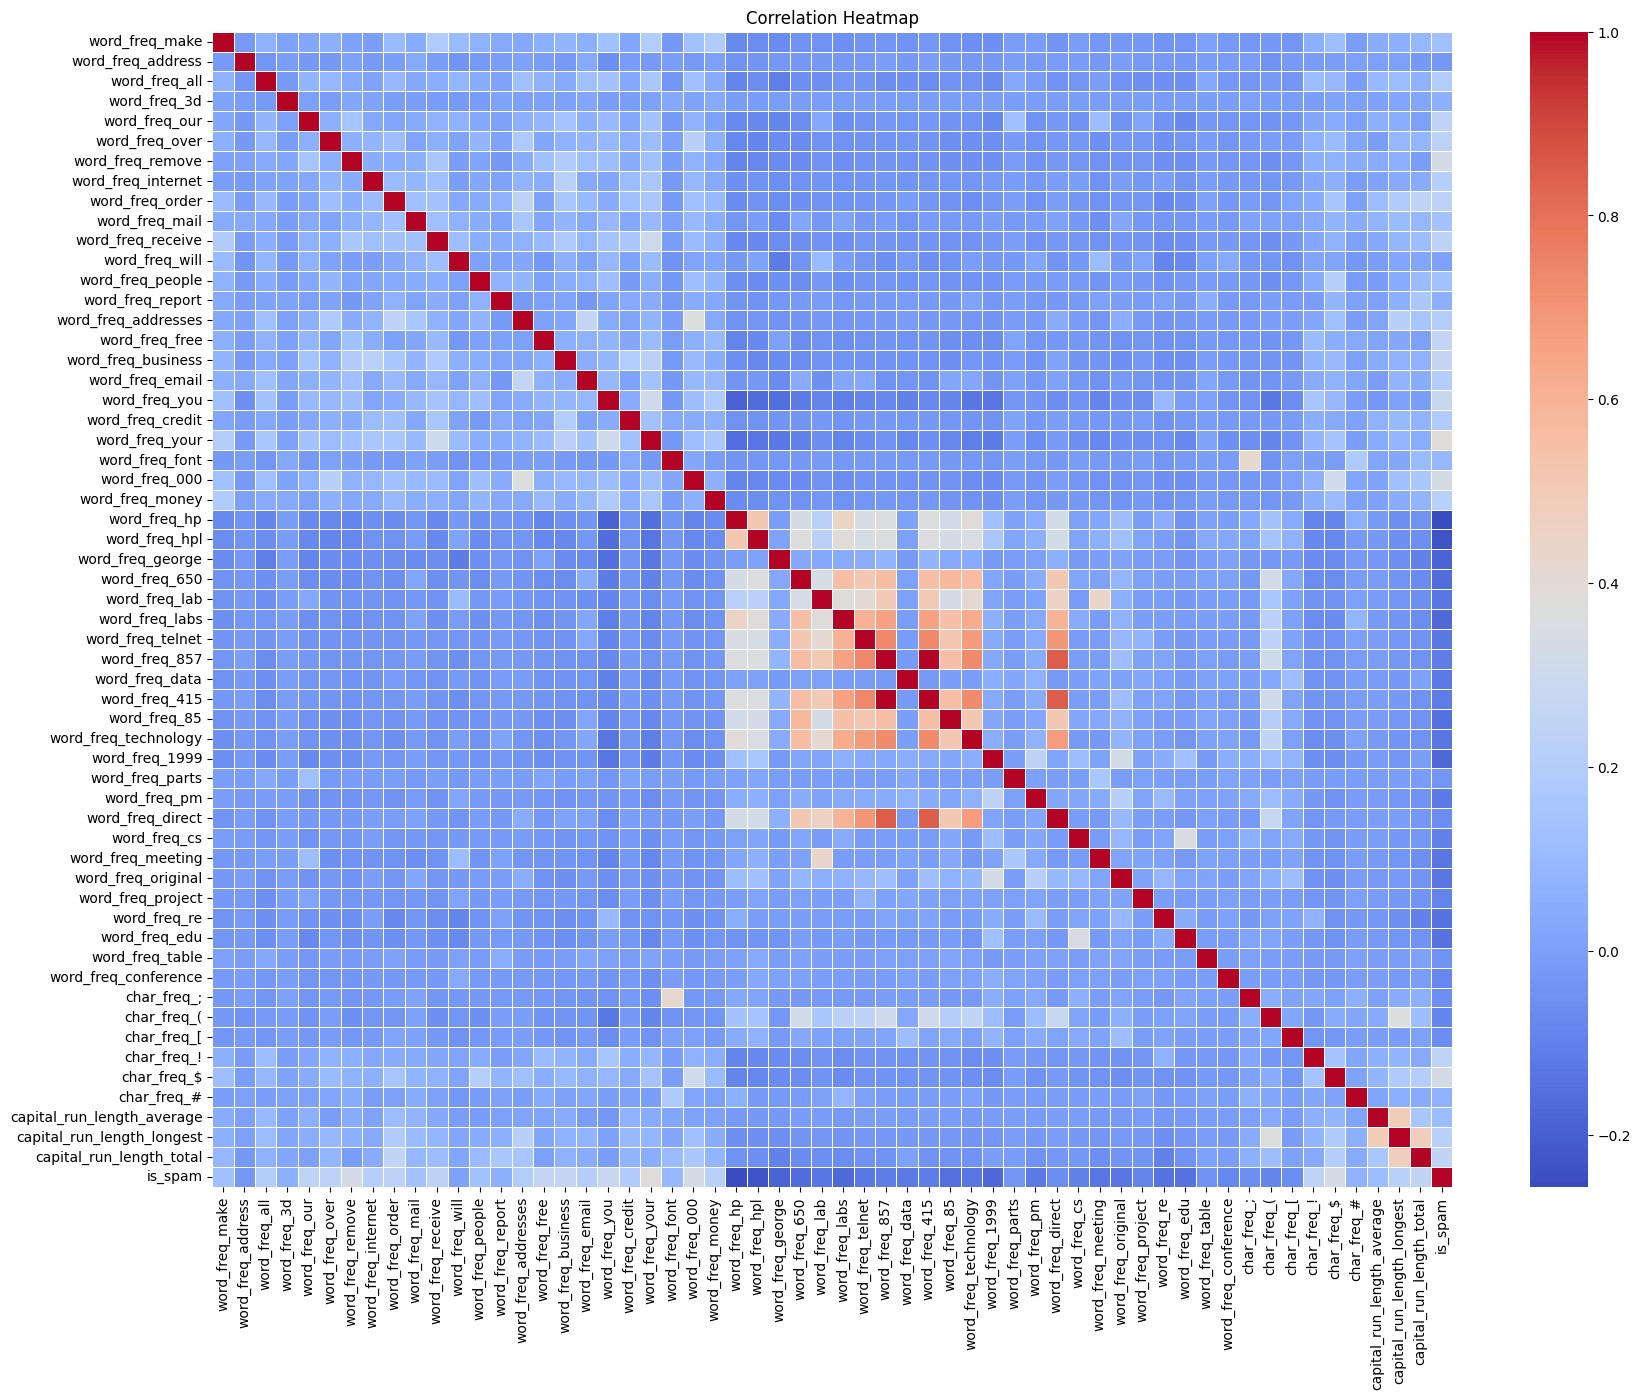

In [15]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
correlation_with_target = data.corr()['is_spam'].drop('is_spam').sort_values(key=abs, ascending=False)
print("Top 10 Correlated Features with Target:")
print(correlation_with_target.head(10))


Top 10 Correlated Features with Target:
word_freq_your              0.383234
word_freq_000               0.334787
word_freq_remove            0.332117
char_freq_$                 0.323629
word_freq_you               0.273651
word_freq_free              0.263215
word_freq_business          0.263204
word_freq_hp               -0.256723
capital_run_length_total    0.249164
word_freq_our               0.241920
Name: is_spam, dtype: float64


C:\Users\shibam\AppData\Local\Temp\ipykernel_23476\549491266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_spam', y=feature, data=data, palette='Set2')


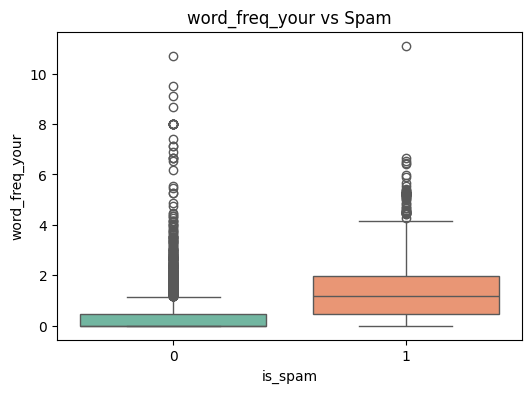

C:\Users\shibam\AppData\Local\Temp\ipykernel_23476\549491266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_spam', y=feature, data=data, palette='Set2')


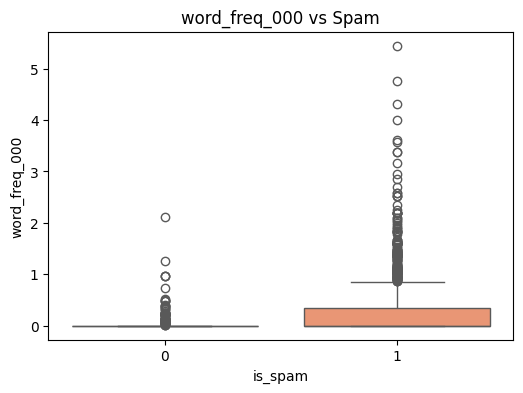

C:\Users\shibam\AppData\Local\Temp\ipykernel_23476\549491266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_spam', y=feature, data=data, palette='Set2')


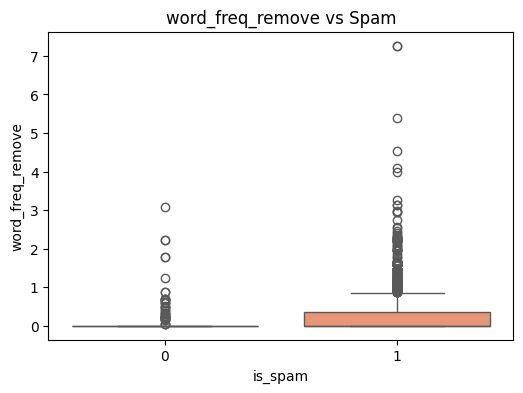

C:\Users\shibam\AppData\Local\Temp\ipykernel_23476\549491266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_spam', y=feature, data=data, palette='Set2')


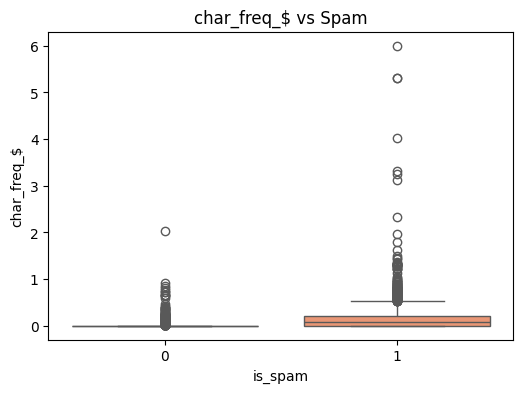

C:\Users\shibam\AppData\Local\Temp\ipykernel_23476\549491266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_spam', y=feature, data=data, palette='Set2')


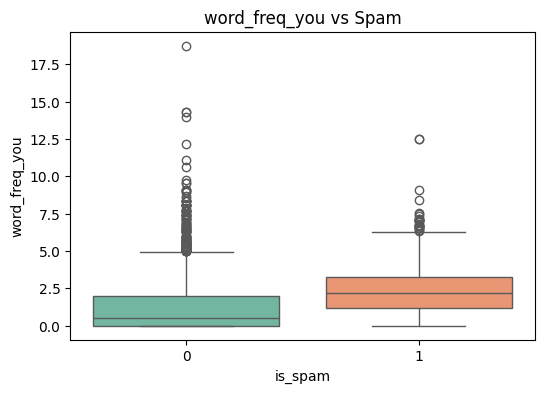

In [17]:
top_features = correlation_with_target.head(5).index.tolist()
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='is_spam', y=feature, data=data, palette='Set2')
    plt.title(f"{feature} vs Spam")
    plt.show()


In [18]:
skewness = data.skew().sort_values(ascending=False)
print("Top 10 Most Skewed Features:")
print(skewness.head(10))


Top 10 Most Skewed Features:
char_freq_#                   31.062064
capital_run_length_longest    30.764993
word_freq_parts               28.263216
word_freq_3d                  26.227744
capital_run_length_average    23.761923
char_freq_[                   21.083545
word_freq_table               19.867691
word_freq_conference          19.720446
word_freq_project             18.771515
char_freq_!                   18.658004
dtype: float64


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:


X = data.drop(columns=['is_spam'])
y = data['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
!pip install xgboost


In [22]:
from sklearn.metrics import accuracy_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [23]:


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(max_iter=500),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} ➤ Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%, Precision: {precision_score(y_test, y_pred)*100:.2f}%")


Logistic Regression ➤ Accuracy: 92.94%, Precision: 92.09%
Random Forest ➤ Accuracy: 94.68%, Precision: 95.38%
Neural Network ➤ Accuracy: 93.92%, Precision: 92.52%
XGBoost ➤ Accuracy: 94.90%, Precision: 93.65%
SVM ➤ Accuracy: 92.73%, Precision: 92.77%


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

# Randomized Search CV
rs = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
rs.fit(X_train_scaled, y_train)

# Best model and parameters
best_model = rs.best_estimator_
best_params = rs.best_params_

# Predict on test set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("✅ Best parameters:", best_params)
print("✅ Best precision during CV:", rs.best_score_)
print("✅ Test Precision:", precision * 100)
print("✅ Test Accuracy:", accuracy * 100)


C:\Users\shibam\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:44:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}
✅ Best precision during CV: 0.9456898742304116
✅ Test Precision: 93.68131868131869
✅ Test Accuracy: 95.11400651465797


In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score, classification_report

# Unpack your best params
best_params = {
    'n_estimators': 100,
    'max_depth': 7,
    'learning_rate': 0.01,
    'subsample': 1.0,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42
}

# Retrain
xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train_scaled, y_train)

# Predict & evaluate
y_pred = xgb_best.predict(X_test_scaled)
print("XGB Test Precision:  {:.2f}%".format(precision_score(y_test, y_pred) * 100))
print("XGB Test Accuracy:   {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\shibam\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:44:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB Test Precision:  94.01%
XGB Test Accuracy:   92.51%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       558
           1       0.94      0.87      0.90       363

    accuracy                           0.93       921
   macro avg       0.93      0.91      0.92       921
weighted avg       0.93      0.93      0.92       921



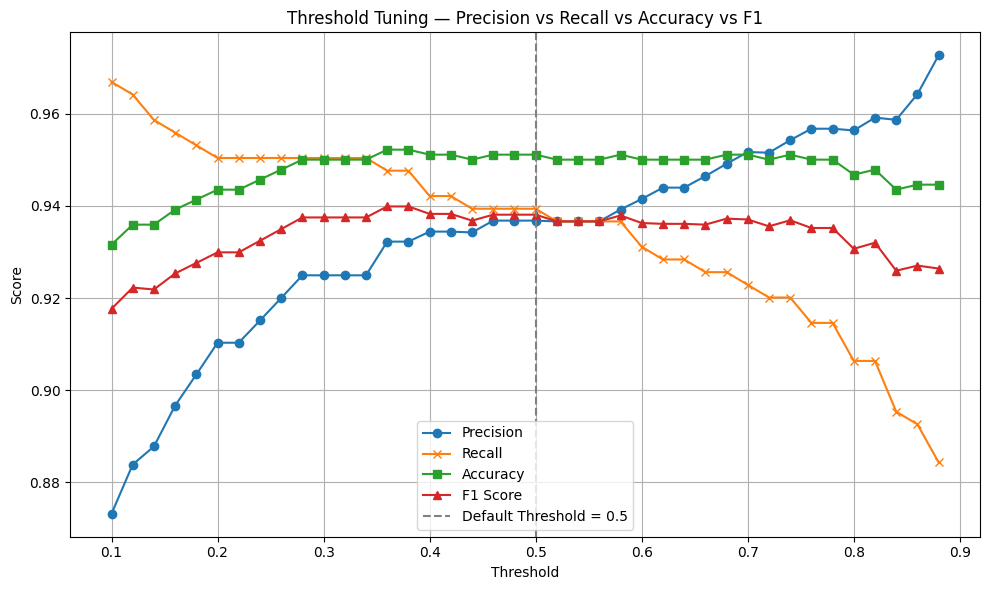

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Get predicted probabilities for class 1 (spam)
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# Store results
thresholds = np.arange(0.1, 0.9, 0.02)
precisions = []
recalls = []
accuracies = []
f1s = []

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    accuracies.append(accuracy_score(y_test, y_pred_thresh))
    f1s.append(f1_score(y_test, y_pred_thresh))

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='x')
plt.plot(thresholds, accuracies, label='Accuracy', marker='s')
plt.plot(thresholds, f1s, label='F1 Score', marker='^')
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold = 0.5')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning — Precision vs Recall vs Accuracy vs F1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
optimal_threshold = 0.65  # example based on plot
y_final = (y_probs >= optimal_threshold).astype(int)

print("🔍 Final Accuracy:", accuracy_score(y_test, y_final)*100)
print("🔍 Final Precision:", precision_score(y_test, y_final)*100)
print("🔍 Final Recall:", recall_score(y_test, y_final)*100)
print("🔍 Final F1 Score:", f1_score(y_test, y_final)*100)


🔍 Final Accuracy: 95.00542888165037
🔍 Final Precision: 94.39775910364145
🔍 Final Recall: 92.8374655647383
🔍 Final F1 Score: 93.61111111111111


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
gs_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gs_rf.fit(X_train_scaled, y_train)

best_rf = gs_rf.best_estimator_


***lets try tune in random forest***

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train_scaled, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Print results
print("✅ Best Random Forest Parameters:", grid_search.best_params_)
print("🔍 Accuracy:", acc * 100)
print("🔍 Precision:", prec * 100)
print("🔍 Recall:", rec * 100)
print("🔍 F1 Score:", f1 * 100)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ Best Random Forest Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
🔍 Accuracy: 95.43973941368078
🔍 Precision: 96.25360230547551
🔍 Recall: 92.01101928374655
🔍 F1 Score: 94.08450704225352


In [41]:
import joblib
joblib.dump(best_rf, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']